# Initial Data Exploration of Planet Reflectance Values

~~currently (2-13) we've only got snow-cover imagery, so here goes with that analysis.~~ it's all here now

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

plt.rcParams['figure.figsize'] = (12, 9)
%config InlineBackend.figure_format = 'retina'
plt.rcParams['font.size'] = 18


In [3]:

datafile = "../images/snow/PROVISIONAL_snow_datatable.csv"
nosnowfile = "../images/no-snow/PROVISIONAL_nosnow_datatable.csv"
data = pd.read_csv(datafile)
snowdata = data
nosnow_data = pd.read_csv(nosnowfile)


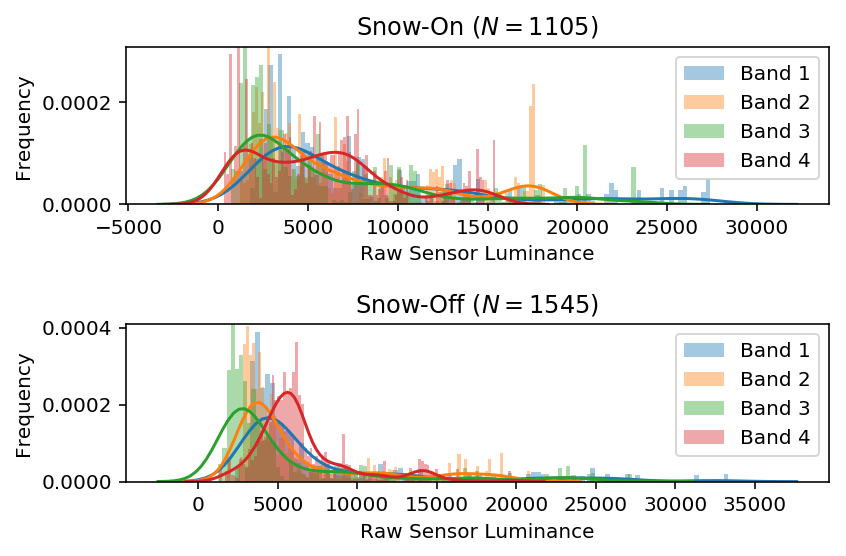

In [4]:
f, (ax1, ax2) = plt.subplots(2, 1)

bins = 100
sns.distplot(data.band1, label='Band 1', bins=bins, ax=ax1)
sns.distplot(data.band2, label='Band 2', bins=bins, ax=ax1)
sns.distplot(data.band3, label="Band 3", bins=bins, ax=ax1)
sns.distplot(data.band4, label='Band 4', bins=bins, ax=ax1)
ax1.set_xlabel("Raw Sensor Luminance")
ax1.set_ylabel("Frequency")
ax1.set_title("Snow-On ($N = {n}$)".format(n = len(data)))
#ax1.set_xlim(0, 1)
ax1.legend()

bins = 100
sns.distplot(nosnow_data.band1, label='Band 1', bins=bins, ax=ax2)
sns.distplot(nosnow_data.band2, label='Band 2', bins=bins, ax=ax2)
sns.distplot(nosnow_data.band3, label="Band 3", bins=bins, ax=ax2)
sns.distplot(nosnow_data.band4, label='Band 4', bins=bins, ax=ax2)
ax2.set_xlabel("Raw Sensor Luminance")
ax2.set_ylabel("Frequency")
ax2.set_title("Snow-Off ($N = {n}$)".format(n = len(nosnow_data)))
#ax2.set_xlim(0, 1)
ax2.legend()
f.tight_layout()
plt.savefig("../figures/histcompare.png", dpi=100, transparent=True)

In [5]:
?ax1.set_title

Signature: ax1.set_title(label, fontdict=None, loc='center', **kwargs)
Docstring:
Set a title for the axes.

Set one of the three available axes titles. The available titles
are positioned above the axes in the center, flush with the left
edge, and flush with the right edge.

Parameters
----------
label : str
    Text to use for the title

fontdict : dict
    A dictionary controlling the appearance of the title text,
    the default `fontdict` is::

       {'fontsize': rcParams['axes.titlesize'],
        'fontweight' : rcParams['axes.titleweight'],
        'verticalalignment': 'baseline',
        'horizontalalignment': loc}

loc : {'center', 'left', 'right'}, str, optional
    Which title to set, defaults to 'center'

Returns
-------
text : :class:`~matplotlib.text.Text`
    The matplotlib text instance representing the title

Other Parameters
----------------
**kwargs : `~matplotlib.text.Text` properties
    Other keyword arguments are text properties, see
    :class:`~matplotlib.text

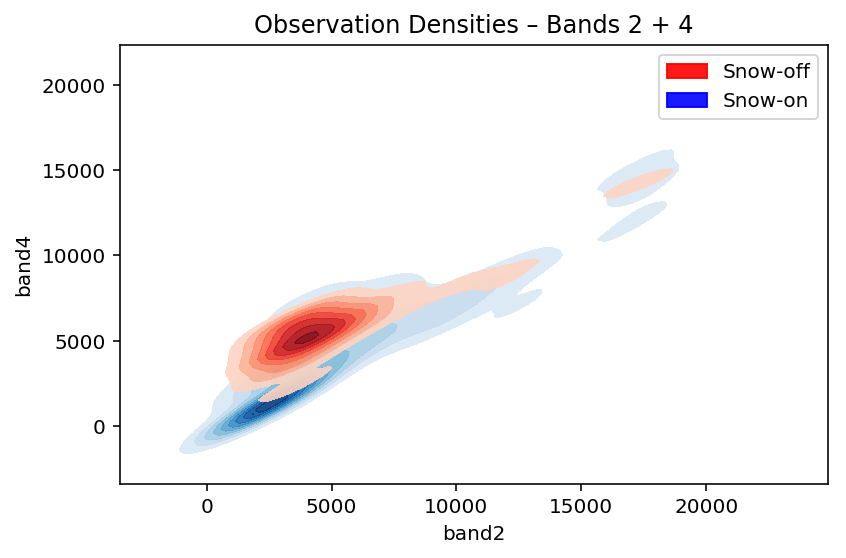

In [9]:
b1 = 'band2'
b2 = 'band4'

sns.kdeplot(snowdata[b1], snowdata[b2], cmap='Blues', shade=True, shade_lowest=False, alpha=0.9)
sns.kdeplot(nosnow_data[b1], nosnow_data[b2], cmap='Reds', shade=True, shade_lowest=False, alpha = 0.9)
nsp = patches.Patch(color='red', alpha=0.9, label='Snow-off')
sp = patches.Patch(color='blue', alpha=0.9, label='Snow-on')
plt.legend(handles=[nsp, sp])
plt.title("Observation Densities – Bands 2 + 4")
plt.tight_layout()
plt.savefig("../figures/kde-4-2.png", dpi=100, transparent=True)

In [43]:
!ls

data-exploration.ipynb	pipeline-all.py			  sensor_bbox.json
data extract.ipynb	pipeline-all-with-download.ipynb  testout.png
histcompare.png		pipeline-all-with-download.py	  Untitled1.ipynb
image_utils		PROVISIONAL_datatable.csv	  Untitled2.ipynb
locations.html		PROVISIONAL_nosnow_datatable.csv  Untitled.ipynb
ml-v1.ipynb		README.md
pipeline-all.ipynb	search-test.ipynb


In [15]:
from sklearn.metrics import accuracy_score

In [16]:
bands = ['band1', 'band2', 'band3', 'band4']
nosnowbands = nosnow_data[bands]
nosnowbands['label'] = 0
snowbands = data[bands]
snowbands['label'] = 1

merged = pd.concat([snowbands, nosnowbands], axis=0)
merged.head()

/home/ec2-user/miniconda3/envs/imageprocess2/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/home/ec2-user/miniconda3/envs/imageprocess2/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


,band1,band2,band3,band4,label
0,5888,5137,3943,7086,1
1,5981,5216,4107,7318,1
2,5818,5024,3855,7025,1
3,5796,4992,3856,6739,1
4,5880,5093,3967,7061,1


In [17]:
import sklearn.cluster as cluster
from sklearn.preprocessing import StandardScaler
import numpy as np

In [18]:
bands_scaled = StandardScaler().fit_transform(merged[bands])
bands_scaled.shape

(2650, 4)

In [19]:

km = cluster.KMeans(n_clusters = 2).fit_predict(bands_scaled)

In [20]:
km

array([1, 1, 1, ..., 1, 1, 1], dtype=int32)

In [21]:
incorrect = sum(abs(km - merged.label)) / len(km) # % incorrect
correct = 1-incorrect
print(correct)

0.429433962264151


In [22]:
spectral = cluster.SpectralClustering(
        n_clusters=2, eigen_solver='arpack',
        affinity="nearest_neighbors").fit_predict(merged[bands])

/home/ec2-user/miniconda3/envs/imageprocess2/lib/python3.6/site-packages/sklearn/manifold/spectral_embedding_.py:234: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


In [23]:
incorrect = sum(abs(spectral - merged.label)) / len(spectral) # % incorrect
correct = 1-incorrect
print(correct)

0.639245283018868


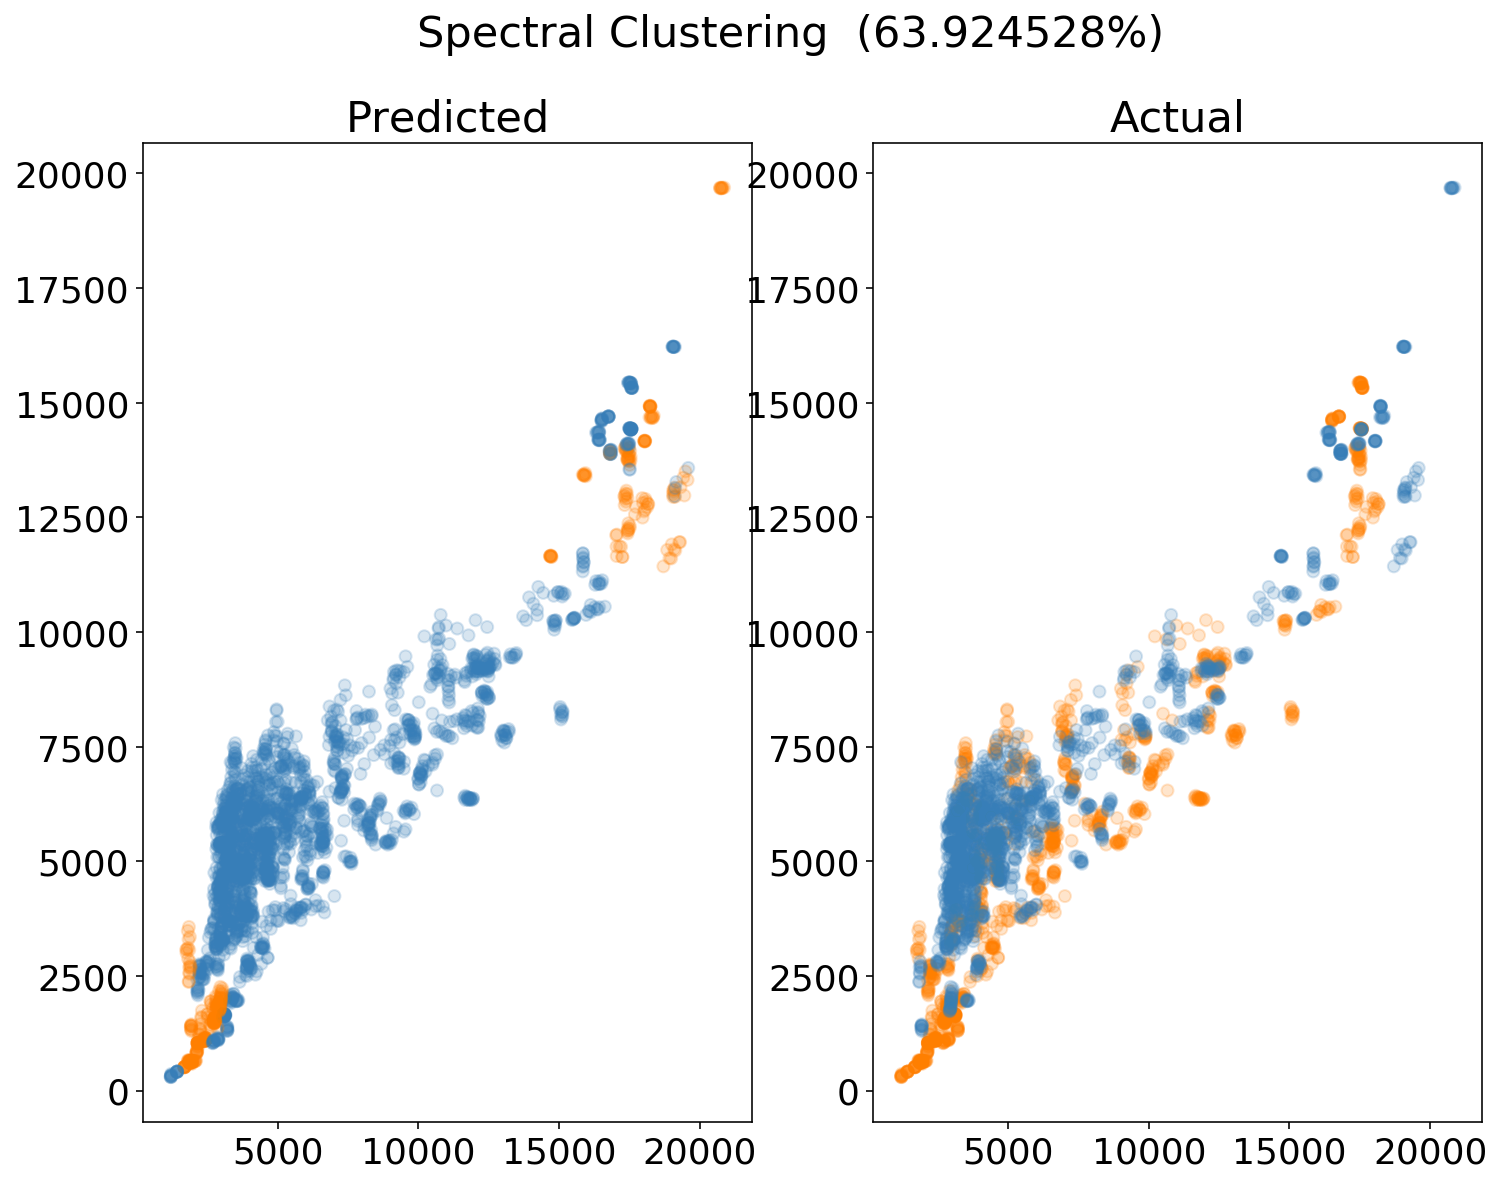

In [28]:
preds = spectral
accuracy = accuracy_score(merged.label, preds)
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle("Spectral Clustering  ({:f}%)".format(accuracy*100))
colors = np.array(['#377eb8', '#ff7f00'])
ax1.scatter(merged['band2'], merged['band4'], color=colors[preds], alpha=0.2)
ax1.set_title("Predicted")
ax2.scatter(merged['band2'], merged['band4'], color=colors[merged.label], alpha=0.2)
ax2.set_title("Actual")
f.tight_layout()

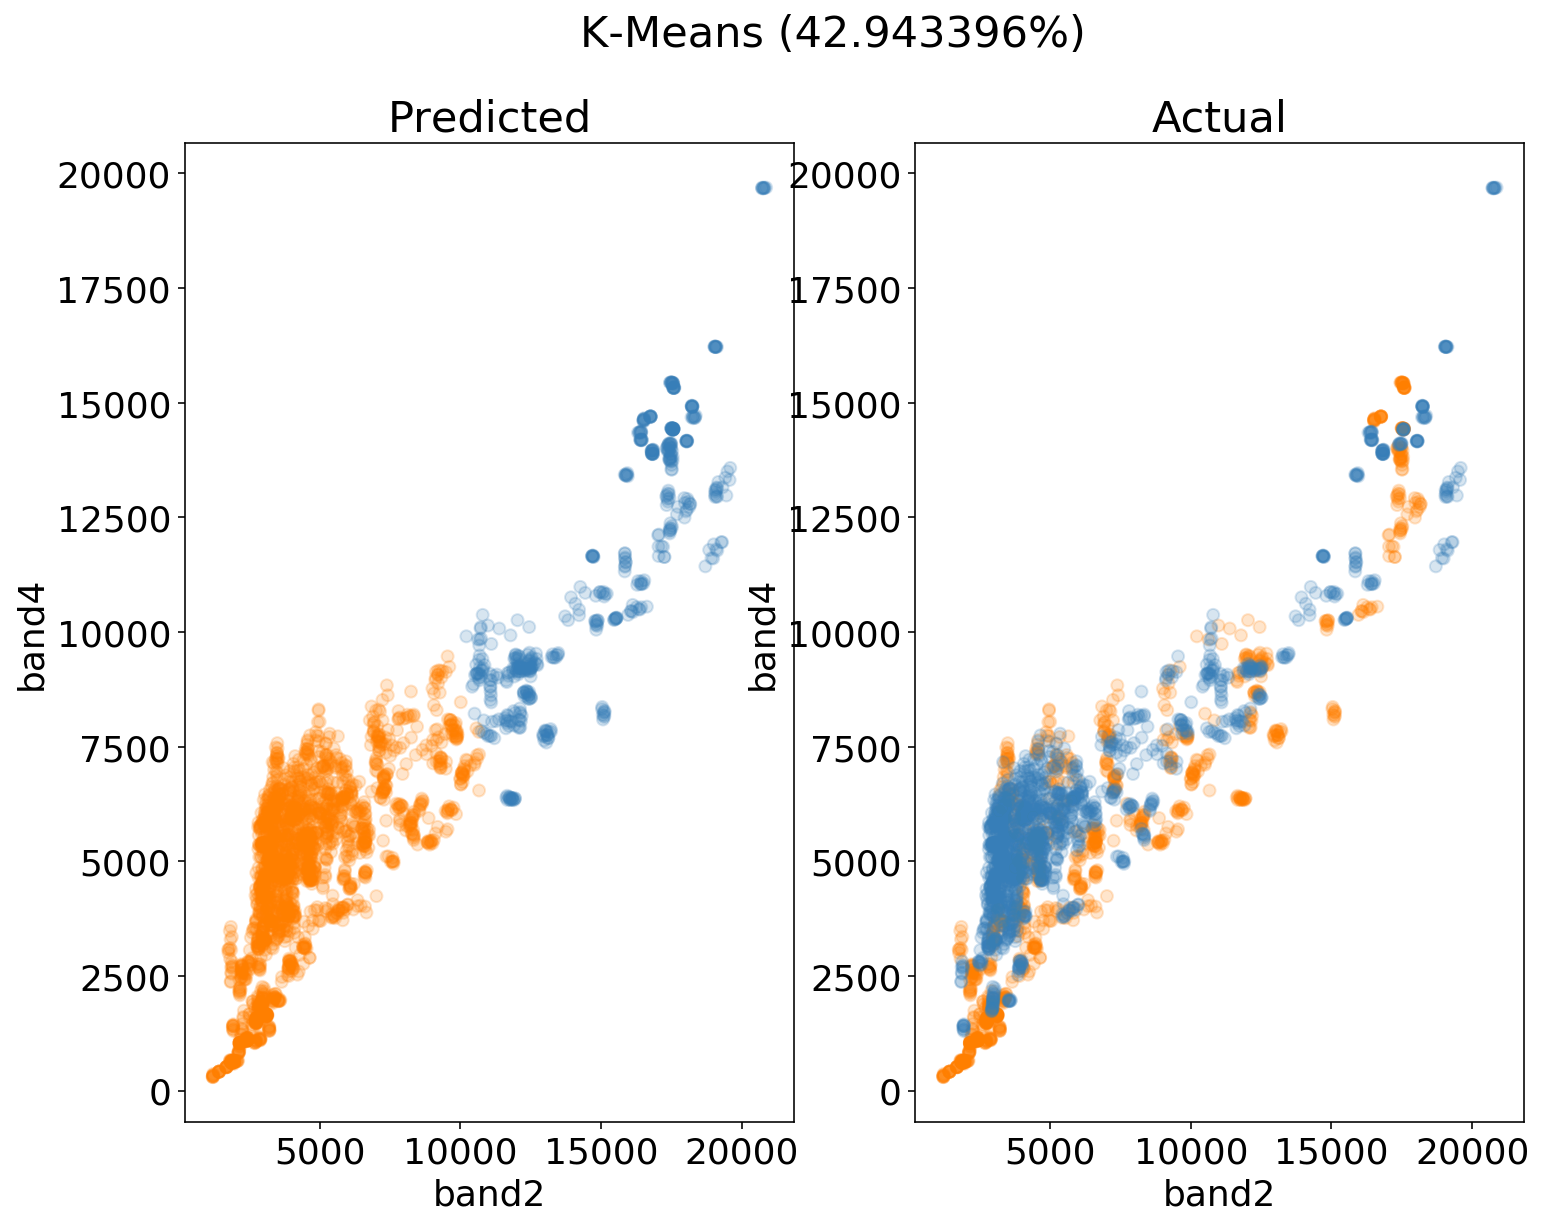

In [29]:
preds = km
b1 = 'band2'
b2 = 'band4'
accuracy = accuracy_score(merged.label, preds)
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle("K-Means ({:f}%)".format(accuracy*100))
colors = np.array(['#377eb8', '#ff7f00'])
ax1.scatter(merged[b1], merged[b2], color=colors[preds], alpha=0.2)
ax1.set_xlabel(b1)
ax1.set_ylabel(b2)
ax1.set_title("Predicted")
ax2.scatter(merged[b1], merged[b2], color=colors[merged.label], alpha=0.2)
ax2.set_title("Actual")
ax2.set_xlabel(b1)
ax2.set_ylabel(b2)
f.tight_layout()
plt.savefig("../figures/kmeans.png", dpi=100, transparent=True)

In [55]:
from sklearn.mixture import GaussianMixture
import matplotlib.patches as patches

In [56]:
gm = GaussianMixture(n_components=2).fit(merged[bands])
gm = gm.predict(merged[bands])


PermissionError: [Errno 13] Permission denied: '../figures/gaussiancluster.png'

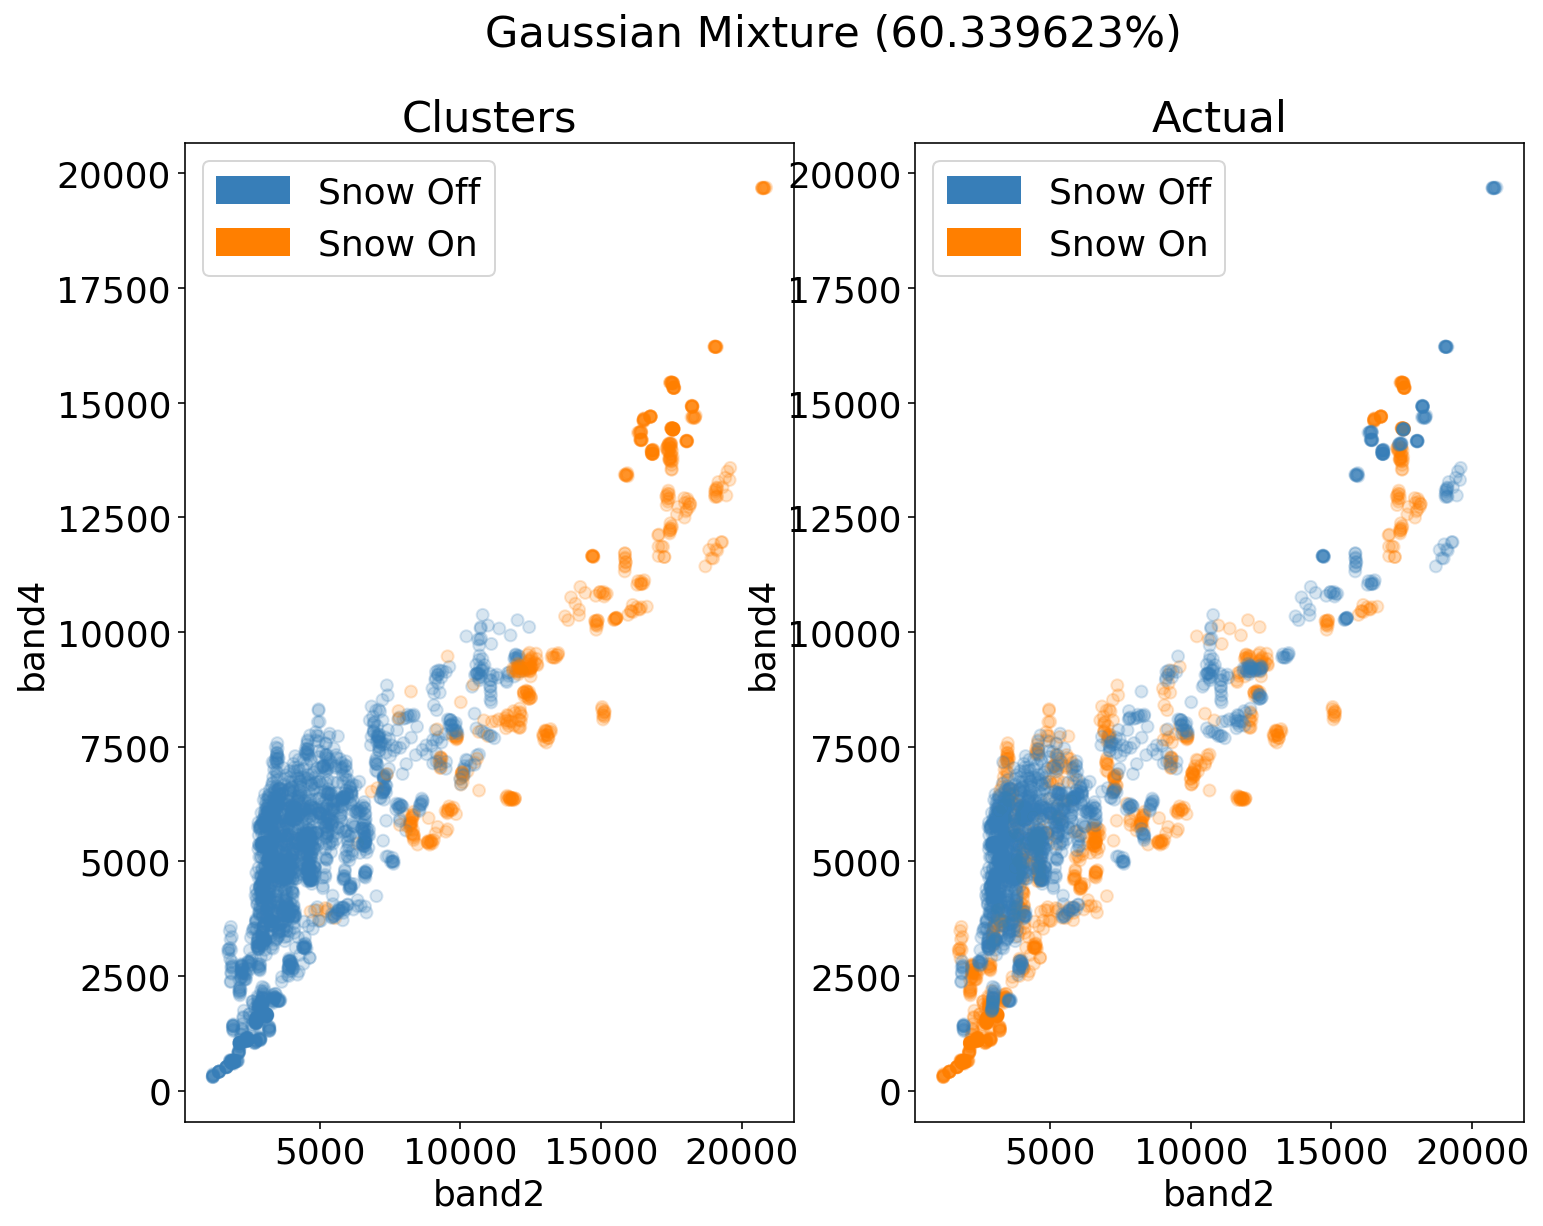

In [58]:
preds = gm
b1 = 'band2'
b2 = 'band4'
accuracy = accuracy_score(merged.label, preds)
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle("Gaussian Mixture ({:f}%)".format(accuracy*100))
colors = np.array(['#377eb8', '#ff7f00'])
ax1.scatter(merged[b1], merged[b2], color=colors[preds], alpha=0.2)
ax1.set_title("Clusters")
ax1.set_xlabel(b1)
ax1.set_ylabel(b2)
ax2.scatter(merged[b1], merged[b2], color=colors[merged.label], alpha=0.2)
ax2.set_title("Actual")
ax2.set_xlabel(b1)
ax2.set_ylabel(b2)
nosnow_patch = patches.Patch(color=colors[0], label="Snow Off")
snow_patch = patches.Patch(color=colors[1], label='Snow On')
ax1.legend(handles=[nosnow_patch, snow_patch])
ax2.legend(handles=[nosnow_patch, snow_patch])
f.tight_layout()
plt.savefig('../figures/gaussiancluster.png')


In [59]:
incorrect = sum(abs(gm - merged.label)) / len(merged.label) # % incorrect
correct = 1-incorrect
print(correct)

0.6033962264150943


----
# Gaussian Process Modeling

In [70]:
from sklearn.gaussian_process import GaussianProcessClassifier, kernels
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
bands = ['band1', 'band2', 'band3', 'band4']
nosnowbands = nosnow_data[bands]
nosnowbands['label'] = 0
snowbands = data[bands]
snowbands['label'] = 1

merged = pd.concat([snowbands, nosnowbands], axis=0)
merged.head()

/home/ec2-user/miniconda3/envs/imageprocess2/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
/home/ec2-user/miniconda3/envs/imageprocess2/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


,band1,band2,band3,band4,label
0,5888,5137,3943,7086,1
1,5981,5216,4107,7318,1
2,5818,5024,3855,7025,1
3,5796,4992,3856,6739,1
4,5880,5093,3967,7061,1


In [71]:
# Defaults
gpc = GaussianProcessClassifier(n_jobs=-1)
kfcv = KFold(n_splits=5, shuffle=True)

In [72]:
def trainAndTest(split, params):
    train, test = split
    gpc = GaussianProcessClassifier(**params)
    X = data[train]
    y = merged.label.iloc[train]
    X_test = data[test]
    y_test = merged.label.iloc[test]
    gpc.fit(X,y)
    preds = gpc.predict(X_test)
    accuracy = accuracy_score(y_test, preds)
    return(accuracy, gpc)

In [73]:
#data = np.array(merged[bands])
data = StandardScaler().fit_transform(merged[bands])
params = {
    'n_jobs'    : -1,
}
accuracies = []
for train, test in kfcv.split(data):
    accuracy = trainAndTest((train, test), params)
    print(accuracy)
    accuracies.append(accuracy)
    

"Mean: {:f}% ± {:f}%".format(np.mean(accuracies)*100, np.std(accuracies)*100)

(0.7226415094339622, GaussianProcessClassifier(copy_X_train=True, kernel=None,
             max_iter_predict=100, multi_class='one_vs_rest', n_jobs=-1,
             n_restarts_optimizer=0, optimizer='fmin_l_bfgs_b',
             random_state=None, warm_start=False))
(0.7283018867924528, GaussianProcessClassifier(copy_X_train=True, kernel=None,
             max_iter_predict=100, multi_class='one_vs_rest', n_jobs=-1,
             n_restarts_optimizer=0, optimizer='fmin_l_bfgs_b',
             random_state=None, warm_start=False))
(0.7830188679245284, GaussianProcessClassifier(copy_X_train=True, kernel=None,
             max_iter_predict=100, multi_class='one_vs_rest', n_jobs=-1,
             n_restarts_optimizer=0, optimizer='fmin_l_bfgs_b',
             random_state=None, warm_start=False))
(0.8132075471698114, GaussianProcessClassifier(copy_X_train=True, kernel=None,
             max_iter_predict=100, multi_class='one_vs_rest', n_jobs=-1,
             n_restarts_optimizer=0, optimizer=

TypeError: unsupported operand type(s) for +: 'float' and 'GaussianProcessClassifier'

## GPC With RBF Kernel?

In [74]:
from multiprocessing import Pool
from functools import partial


In [75]:
tp = Pool(processes=5)


In [76]:
params = {
    'n_jobs'    : -1,
    'kernel'    : 1.0 * kernels.RBF(length_scale=1.0),
    'optimizer' : None
}
#data = np.array(merged[bands])
data = StandardScaler().fit_transform(merged[bands])
learner = partial(trainAndTest, params = params)
results = tp.map(learner, kfcv.split(data))
accuracies, classifiers = zip(*results)

"Mean: {:f}% ± {:f}%".format(np.mean(accuracies)*100, np.std(accuracies)*100)

'Mean: 76.264151% ± 1.477974%'

In [ ]:
for cl, _ in enumerate(classifiers):
    print(classifiers[cl].log_marginal_likelihood(classifiers[cl].kernel_.theta))

In [83]:
params = {
    'n_jobs'    : -1,
    'kernel'    : 1.0 * kernels.RBF(length_scale=1.0),
}
#data = np.array(merged[bands])
data = StandardScaler().fit_transform(merged[bands])
kfcv = StratifiedKFold(2, shuffle=True)
learner = partial(trainAndTest, params = params)
results = tp.map(learner, kfcv.split(data, merged.label))
accuracies, classifiers = zip(*results)

"Mean: {:f}% ± {:f}%".format(np.mean(accuracies)*100, np.std(accuracies)*100)

'Mean: 93.848797% ± 0.344265%'

In [86]:
pd.DataFrame(data).describe()

,0,1,2,3
count,2.650000e+03,2.650000e+03,2.650000e+03,2.650000e+03
mean,-5.362587e-18,-3.753811e-17,3.753811e-17,-1.287021e-16
std,1.000189e+00,1.000189e+00,1.000189e+00,1.000189e+00
min,-9.558177e-01,-1.132296e+00,-9.199809e-01,-1.692388e+00
25%,-6.335299e-01,-6.975167e-01,-6.378750e-01,-6.072049e-01
50%,-4.356505e-01,-4.362706e-01,-4.226601e-01,-1.287127e-01
75%,2.343739e-01,4.076420e-01,3.212762e-01,3.546487e-01
max,4.019098e+00,3.004967e+00,3.912537e+00,3.945738e+00


In [ ]:
classifiers[0].score(X)

In [ ]:
for cl, _ in enumerate(classifiers):
    print(classifiers[cl].log_marginal_likelihood(classifiers[cl].kernel_.theta))
    print(classifiers[cl].kernel_)


** extremely ** promising

In [ ]:
classifiers[0].predict_proba(data)[2]

In [ ]:
classifiers[0].predict(data)[2]

In [ ]:
import matplotlib.patches as patches
plt.rcParams['font.size'] = 12
preds = classifiers[0].predict(data)
b1 = 'band2'
b2 = 'band4'
accuracy = accuracy_score(merged.label, preds)
print(accuracy)
fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
colors = np.array(['#377eb8', '#ff7f00'])
ax1.scatter(merged[b1], merged[b2], color=colors[preds], alpha=0.2)
ax1.set_title("Predictions")
ax1.set_xlabel(b1)
ax1.set_ylabel(b2)
ax2.scatter(merged[b1], merged[b2], color=colors[merged.label], alpha=0.2)
ax2.set_title("Actual")
ax2.set_xlabel(b1)
ax2.set_ylabel(b2)
nosnow_patch = patches.Patch(color=colors[0], label="Snow Off")
snow_patch = patches.Patch(color=colors[1], label='Snow On')
ax1.legend(handles=[nosnow_patch, snow_patch])
ax2.legend(handles=[nosnow_patch, snow_patch])

incorrect = abs(preds - merged.label)
ax3.set_title("Mistakes")
ax3.scatter(merged[b1], merged[b2], color=colors[incorrect], alpha=0.9)
right_patch = patches.Patch(color=colors[0], label="Correct")
wrong_patch = patches.Patch(color=colors[1], label='Incorrect')

ax1.legend(handles=[nosnow_patch, snow_patch])
ax2.legend(handles=[nosnow_patch, snow_patch])
ax3.legend(handles=[right_patch, wrong_patch])

plt.tight_layout(w_pad=0.9)

